In [42]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

Converting color image into grayscale (using the average method): (Task: 1-4)

In [6]:
def convolve(img, kernel):
    width, height = img.size
    pixels = img.load()

    for py in range(height):
        for px in range(width):
            r, g, b = img.getpixel((px, py))

            v = np.array([[r], [g], [b]])
            res = np.dot(kernel, v)

            tr, tg, tb = int(res[0, 0]), int(res[1, 0]), int(res[2, 0])

            if tr > 255:
                tr = 255

            if tg > 255:
                tg = 255

            if tb > 255:
                tb = 255

            pixels[px, py] = (tr, tg, tb)

    return img

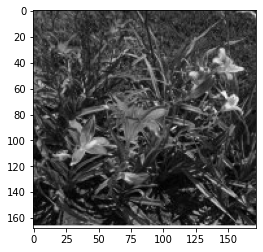

In [43]:
img = Image.open('daylilies.jpg')
grayscale = np.ones((3, 3)) * (1/3)

convolve(img, grayscale)
plt.imshow(img)

Sepia conversion of the image: (Task: 5):

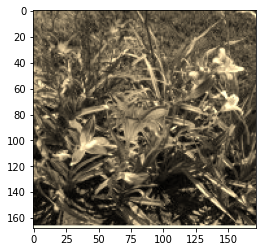

In [45]:
img = Image.open('daylilies.jpg')
sepia = np.array(
    [[0.393, 0.769, 0.189], [0.349, 0.686, 0.168], [0.272, 0.534, 0.131]])

convolve(img, sepia)
plt.imshow(img)

Red filter of the image: (Task: 6)

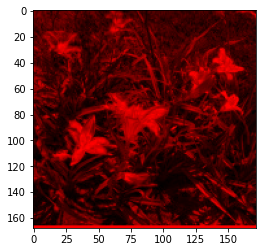

In [46]:
img = Image.open('daylilies.jpg')
red = np.array(
    [[1, 0, 0], [0, 0, 0], [0, 0, 0]])

convolve(img, red)
plt.imshow(img)

Permute the colors of the image. (Task: 7)

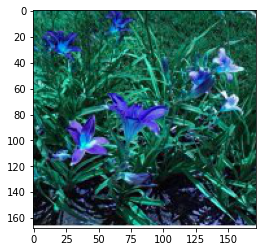

In [47]:
img = Image.open('daylilies.jpg')
permutematrix = np.array(
    [[0, 0, 1], [0, 1, 0], [1, 0, 0]])

convolve(img, permutematrix)
plt.imshow(img)

Deleting the color green from the image: (Task: 8)

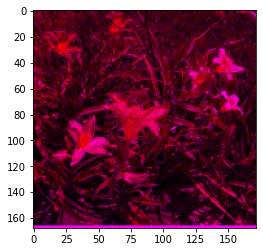

In [48]:
img = Image.open('daylilies.jpg')
deletegreen = np.array(
    [[1, 0, 0], [0, 0, 0], [0, 0, 1]])

convolve(img, deletegreen)
plt.imshow(img)

Inverting the colors of the image: (Task: 9)

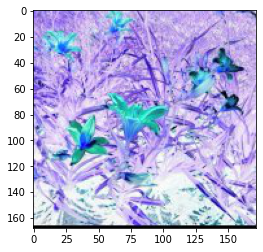

In [49]:
img = Image.open('daylilies.jpg')

image_array = np.array(img)

image_array = 255 - image_array

inverted = Image.fromarray(image_array) 

plt.imshow(inverted)

Saturation filter applied: (Task: 10)

Q3 (answer): The saturate matrix saturates the RGB channels.
The red channel is saturated by a factor of 1.2
The green channel is saturated by a factor of 0.75
The blue channel is saturated by a factor of 2

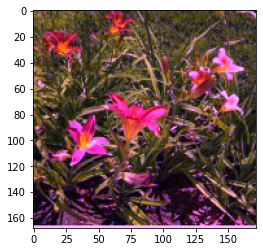

In [50]:
img = Image.open('daylilies.jpg')
saturate = np.array(
    [[1.2, 0, 0], [0, 0.75, 0], [0, 0, 2]])

convolve(img, saturate)
plt.imshow(img)

User filter applied: (Task: 11)

Q4 (answer): The User matrix decreases the contrast of the image.

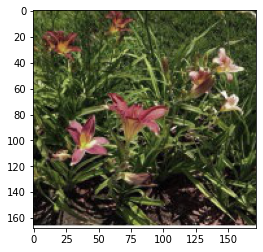

In [51]:
img = Image.open('daylilies.jpg')
user = np.array(
    [[0.7, 0.15, 0.15], [0.15, 0.7, 0.15], [0.15, 0.15, 0.7]])

user_inv = convolve(img, user)
plt.imshow(user_inv)

Invert the user filter: (Task: 12)

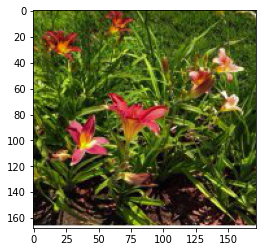

In [52]:
from PIL import ImageOps

img = Image.open('daylilies.jpg')
user = np.array(
    [[0.7, 0.15, 0.15], [0.15, 0.7, 0.15], [0.15, 0.15, 0.7]])

user_img = convolve(img, user)

invert_user = np.linalg.inv(user)

inverted_user_img = convolve(user_img, invert_user)

plt.imshow(inverted_user_img)

Check if sepia transformation is invertible: (Task: 13) 

Q6 (answer): The image was not able to be inverted. This is because the sepia matrix is not invertible.

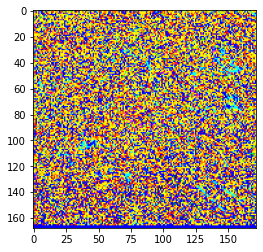

In [53]:
from PIL import ImageOps

img = Image.open('daylilies.jpg')
sepia = np.array(
    [[0.393, 0.769, 0.189], [0.349, 0.686, 0.168], [0.272, 0.534, 0.131]])

sepia_img = convolve(img, sepia)

invert_sepia = np.linalg.inv(sepia)

inverted_sepia_img = convolve(sepia_img, invert_sepia)

plt.imshow(inverted_sepia_img)

Non-linear color transformation using Gamma-conversion: (Task: 14)

In [54]:
import cv2

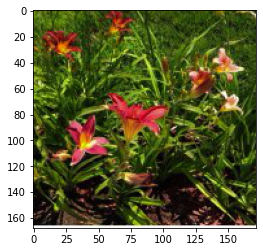

In [58]:
def gamma_correction(img, gamma=0.9):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(img, table)

img = Image.open('daylilies.jpg')
img_np = np.array(img)
gamma1 = gamma_correction(img_np)
plt.imshow(gamma1)

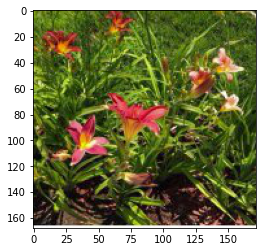

In [59]:
def gamma_correction(img, gamma=1.1):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(img, table)

img = Image.open('daylilies.jpg')
img_np = np.array(img)
gamma2 = gamma_correction(img_np)
plt.imshow(gamma2)